In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install -q kaggle

In [3]:
%cd /content/gdrive/MyDrive/pizzanotpizza

/content/gdrive/MyDrive/pizzanotpizza


In [5]:
! mkdir ~/.kaggle
! cp -f kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d projectshs/pizza-classification-data

 96% 97.0M/101M [00:02<00:00, 57.2MB/s]
100% 101M/101M [00:02<00:00, 43.2MB/s] 


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/pizzanotpizza/pizza-classification-data.zip', 'r')
zip_ref.extractall('/content/gdrive/MyDrive/pizzanotpizza/dataset')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [9]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/pizzanotpizza/dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/pizzanotpizza/dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1600 files belonging to 2 classes.
Found 366 files belonging to 2 classes.


In [10]:
# Normalizar
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# cria a rede neural

model = Sequential()

# Camada convolutiva
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Camanda densa
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
50/50 [==============================] - 401s 8s/step - loss: 6.7099 - accuracy: 0.6294 - val_loss: 5.2261 - val_accuracy: 0.4727
Epoch 2/20
50/50 [==============================] - 373s 7s/step - loss: 3.6498 - accuracy: 0.6775 - val_loss: 5.3466 - val_accuracy: 0.5164
Epoch 3/20
50/50 [==============================] - 360s 7s/step - loss: 2.5107 - accuracy: 0.7138 - val_loss: 2.0275 - val_accuracy: 0.4727
Epoch 4/20
50/50 [==============================] - 388s 8s/step - loss: 1.5433 - accuracy: 0.7306 - val_loss: 2.4033 - val_accuracy: 0.5328
Epoch 5/20
50/50 [==============================] - 370s 7s/step - loss: 1.2165 - accuracy: 0.7756 - val_loss: 2.5397 - val_accuracy: 0.5519
Epoch 6/20
50/50 [==============================] - 381s 8s/step - loss: 0.9006 - accuracy: 0.8031 - val_loss: 2.6305 - val_accuracy: 0.5519
Epoch 7/20
50/50 [==============================] - 380s 8s/step - loss: 0.6570 - accuracy: 0.8319 - val_loss: 2.7510 - val_accuracy: 0.5355
Epoch 8/20
50

In [15]:
model.save("/content/gdrive/MyDrive/pizzanotpizza/model/model_pizza_not_pizza.h5")

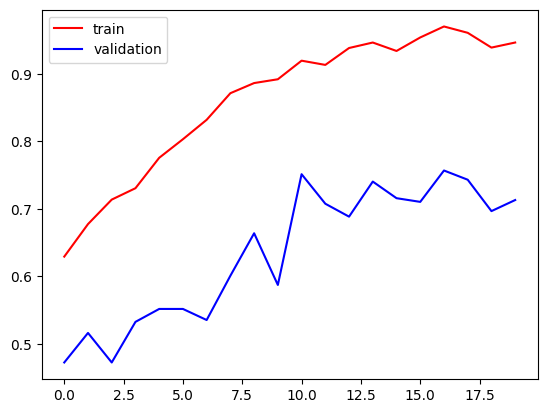

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

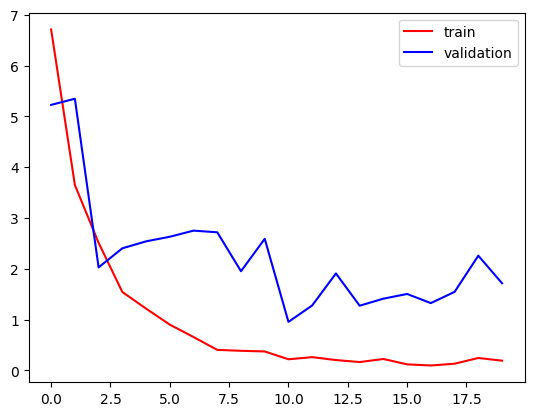

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
loaded_model = tf.keras.saving.load_model("/content/gdrive/MyDrive/pizzanotpizza/model/model_pizza_not_pizza.h5")

In [19]:
import cv2
from google.colab.patches import cv2_imshow

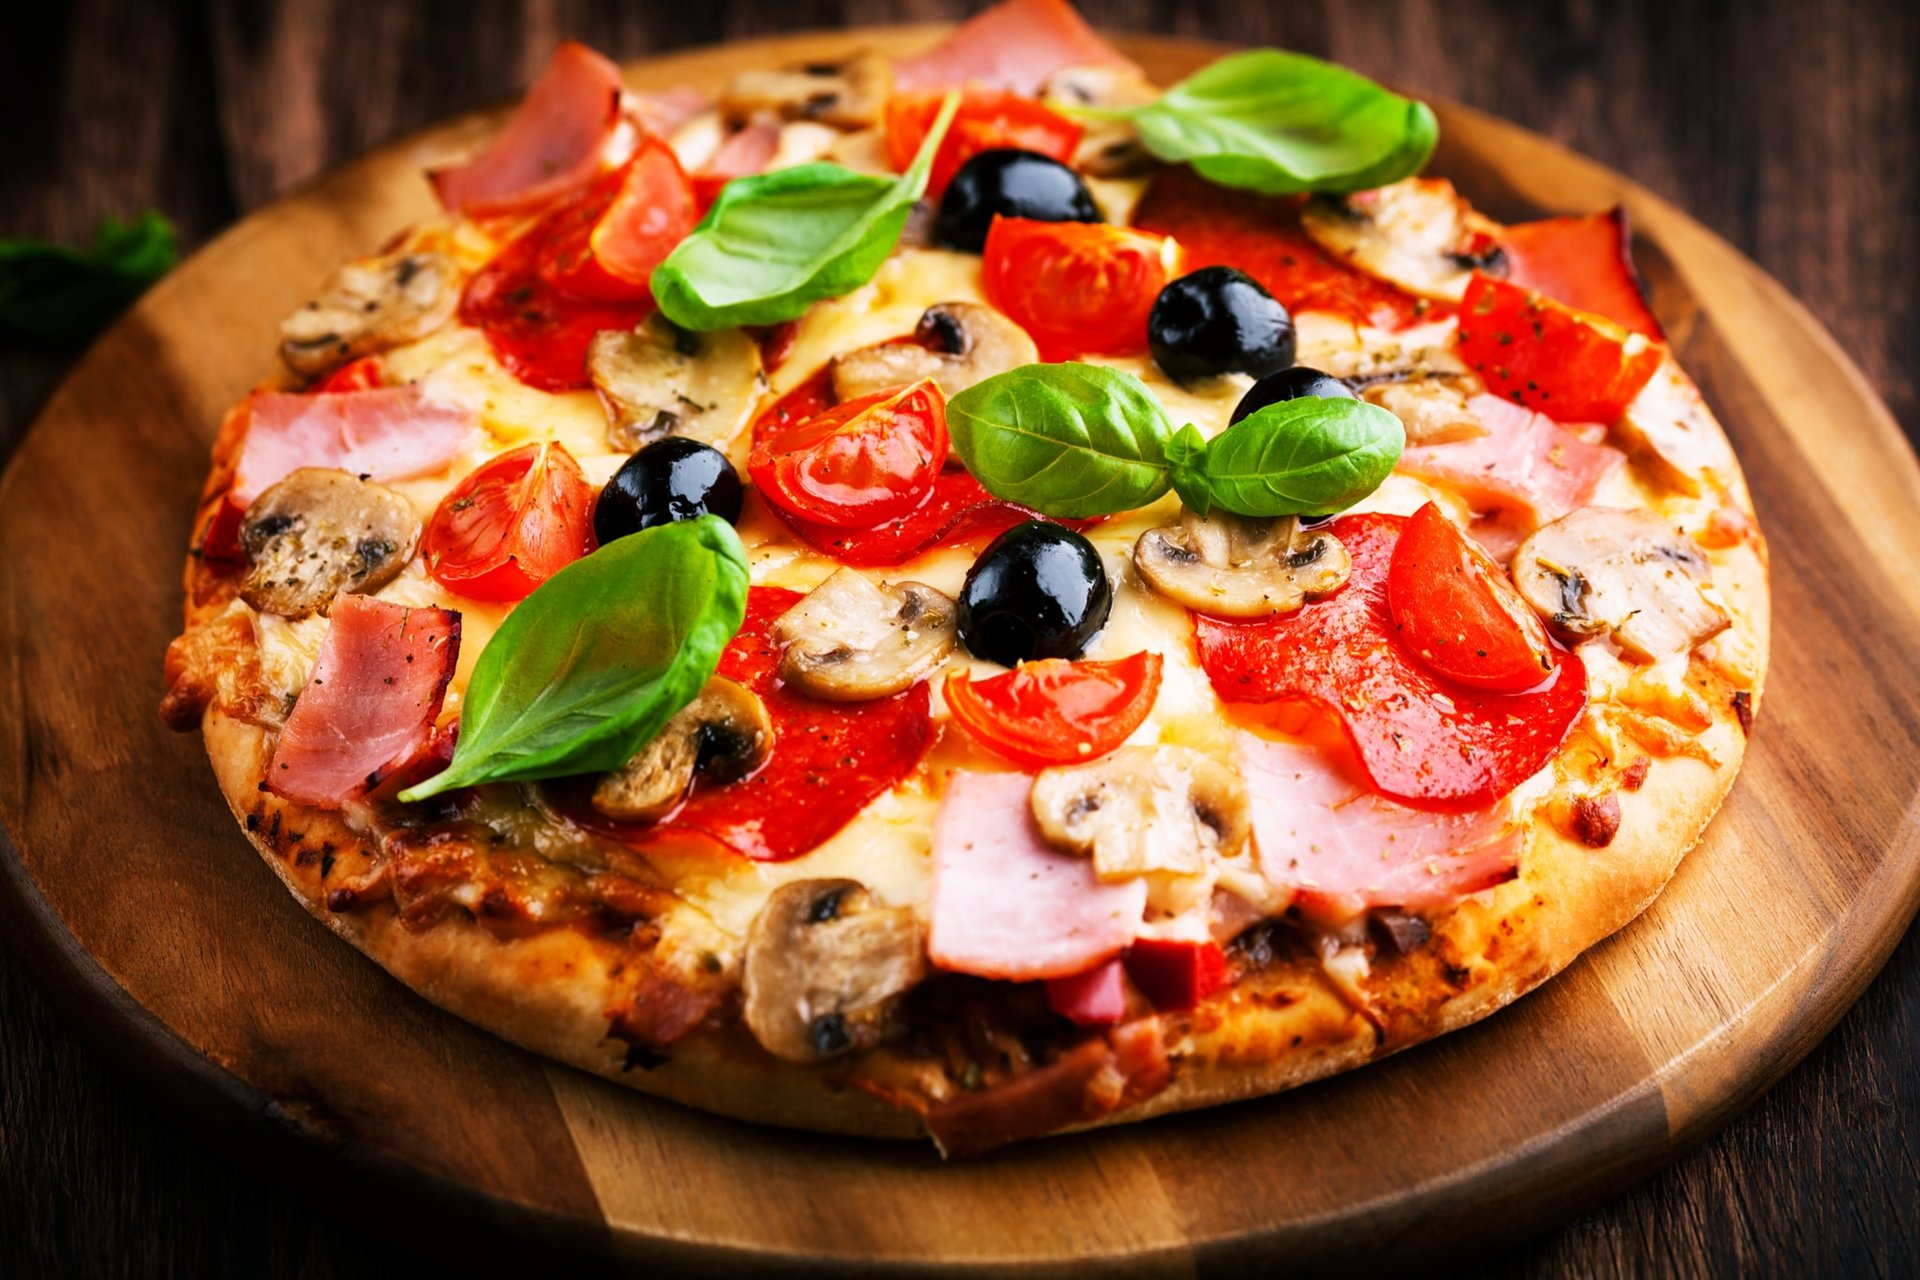

In [20]:
test_img = cv2.imread('/content/gdrive/MyDrive/pizzanotpizza/pizza.jpg')
cv2_imshow(test_img)

In [21]:
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [22]:
loaded_model.predict(test_input)

1/1 [==============================] - 0s 422ms/step


array([[0.]], dtype=float32)

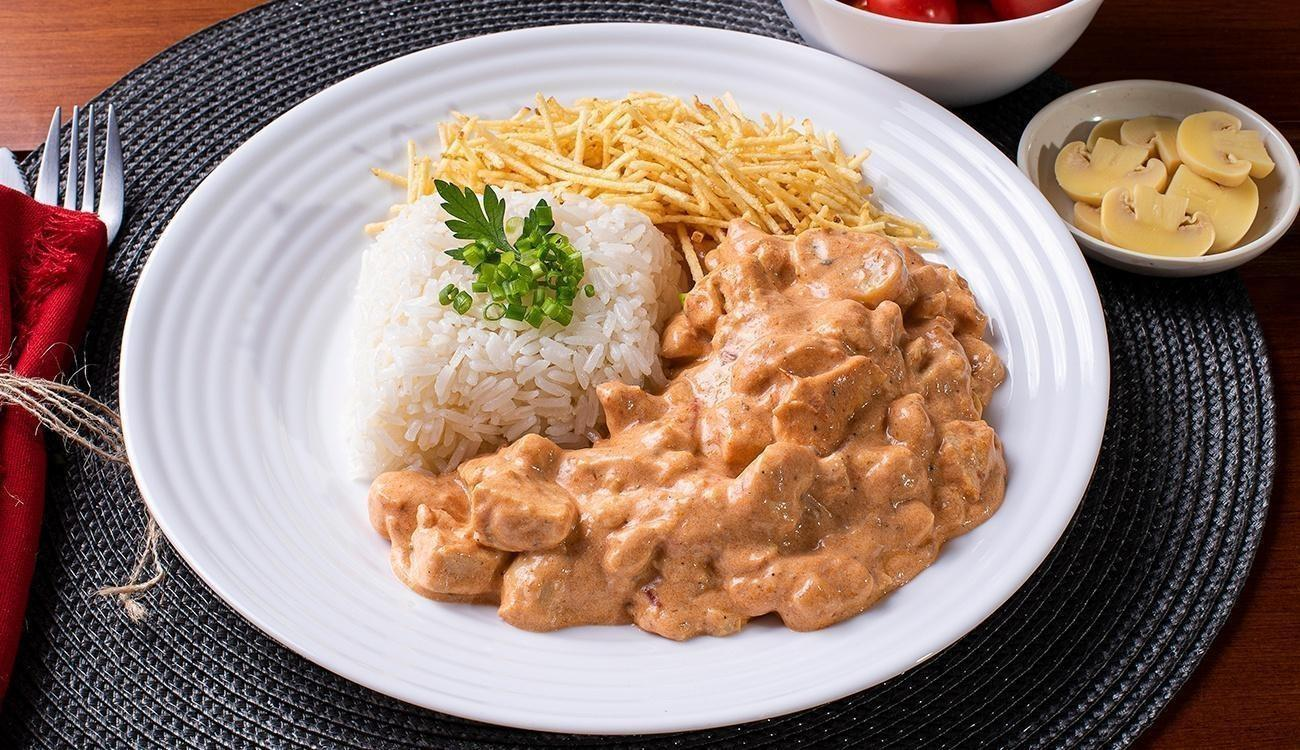

In [23]:
test_img = cv2.imread('/content/gdrive/MyDrive/pizzanotpizza/strogonof.jpg')
cv2_imshow(test_img)

In [24]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
loaded_model.predict(test_input)

1/1 [==============================] - 0s 248ms/step


array([[0.]], dtype=float32)

In [25]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    directory="/content/gdrive/MyDrive/pizzanotpizza/dataset/train",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    subset='training',
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_generator = test_datagen.flow_from_directory(
    directory="/content/gdrive/MyDrive/pizzanotpizza/dataset/train",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 1280 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [26]:
model = Sequential()

# Camada convolutiva
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Camanda densa
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = test_generator.n//test_generator.batch_size,
                    validation_data=test_generator)

Epoch 1/10
40/40 [==============================] - 321s 8s/step - loss: 4.0111 - accuracy: 0.6656 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 317s 8s/step - loss: 2.7627 - accuracy: 0.6523 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
40/40 [==============================] - 312s 8s/step - loss: 1.8284 - accuracy: 0.6891 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
40/40 [==============================] - 313s 8s/step - loss: 0.9032 - accuracy: 0.6859 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
40/40 [==============================] - 317s 8s/step - loss: 0.7023 - accuracy: 0.7008 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
40/40 [==============================] - 321s 8s/step - loss: 0.5987 - accuracy: 0.7312 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
40/40 [==============================] - 321s 8s/step - loss: 0.5379 - accuracy: 0.7352 - val_l